In [1]:

import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import preprocess_input
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.metrics import Recall,Precision
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from keras import models, layers
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from pathlib import Path
from sklearn.metrics import classification_report, confusion_matrix

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


In [2]:
a = pd.read_csv('harth.csv')


In [4]:
a.shape

(408709, 7)

In [5]:
!pip install pyts

from pyts.image import GramianAngularField


In [6]:
gaf = GramianAngularField()

In [7]:
X=a.drop(columns='activity')
y=a['activity']
X.head()
print(y[0])

,alx,aly,alz,arx,ary,arz
0,-0.760242,0.299570,0.468570,-5.092732,-0.298644,0.709439
1,-0.530138,0.281880,0.319987,0.900547,0.286944,0.340309
2,-1.170922,0.186353,-0.167010,-0.035442,-0.078423,-0.515212
3,-0.648772,0.016579,-0.054284,-1.554248,-0.950978,-0.221140
4,-0.355071,-0.051831,-0.113419,-0.547471,0.140903,-0.653782


6


In [8]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [9]:
x_train.fillna(x_train.mean(), inplace=True)
x_test.fillna(x_test.mean(), inplace=True)

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)


# Display the normalized training data
display(x_train_normalized)


array([[0.62528265, 0.54611799, 0.13087461, 0.68503501, 0.59766214,
        0.48267871],
       [0.69382516, 0.55473331, 0.04791845, 0.68114104, 0.59174857,
        0.48360236],
       [0.68179554, 0.54023511, 0.05644231, 0.6875165 , 0.59547781,
        0.48279735],
       ...,
       [0.57901164, 0.55628241, 0.43957907, 0.57731119, 0.59450604,
        0.39142972],
       [0.56795132, 0.56034243, 0.4310191 , 0.58425449, 0.59291082,
        0.33170339],
       [0.57266653, 0.58286969, 0.43593065, 0.58616246, 0.5825038 ,
        0.3342312 ]])

In [11]:
x_train = gaf.fit_transform(x_train)
x_test= gaf.fit_transform(x_test)

In [12]:
#y_train=y_train.to_numpy()
y_train

399796     7
236227     7
162461     7
93056      7
318599    13
          ..
259178     6
365838     3
131932     1
146867     6
121958     6
Name: activity, Length: 286096, dtype: int64

In [13]:
y_test
#=y_test.to_numpy()

90448      7
251195     7
333584    13
209297     7
254703     1
          ..
271432     8
372842     7
241840     7
285405     7
28685      7
Name: activity, Length: 122613, dtype: int64

In [14]:
#y_train = y_train.reshape(y_train.shape[0],1)
print(y_train.shape)

(286096,)


In [15]:
print(x_train.shape)

(286096, 6, 6)


In [16]:
x_train = x_train.reshape(x_train.shape[0],6,6,1)
x_train = x_train.astype('float32')

In [17]:
import keras

In [18]:
# Assuming `labels` is a list or array containing the labels of your dataset
labels = y# Your dataset labels here

# Find unique labels
unique_labels = set(labels)

# Count the number of unique labels
num_classes = len(unique_labels)

print("Number of classes:", num_classes)


Number of classes: 10


In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, MaxPooling2D, Dropout, GlobalMaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from sklearn.metrics import f1_score

# Define precision metric
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

# Define recall metric
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

# Define f1 score metric
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))




# Check unique labels
unique_labels_train = np.unique(y_train)
unique_labels_test = np.unique(y_test)
print("Unique labels in y_train:", unique_labels_train)
print("Unique labels in y_test:", unique_labels_test)

# Find the maximum label value
max_label_value = max(unique_labels_train.max(), unique_labels_test.max())
print("Max label value:", max_label_value)

# Set num_classes to the maximum label value plus one
num_classes = int(max_label_value + 1)
print("Number of classes:", num_classes)

# One-hot encode the target labels
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

print("Shape of y_train_one_hot:", y_train_one_hot.shape)
print("Shape of y_test_one_hot:", y_test_one_hot.shape)

# Define the input shape of the data
input_shape = (6, 6, 1)  

# Build the model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=input_shape, padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    GlobalMaxPooling2D(),

    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')  # Number of classes
])
# Print the shapes to understand the mismatch
print(f"x_train shape: {x_train.shape}")
print(f"y_train_one_hot shape: {y_train_one_hot.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test_one_hot shape: {y_test_one_hot.shape}")

# Assuming x_test is larger by one sample, we truncate it
if x_test.shape[0] > y_test_one_hot.shape[0]:
    x_test = x_test[:y_test_one_hot.shape[0]]

# Verify the shapes again
print(f"Adjusted x_test shape: {x_test.shape}")
print(f"y_test_one_hot shape: {y_test_one_hot.shape}")



# Compile the model with custom metrics
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy', precision_m, recall_m, f1_m])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# Train the model
history=model.fit(x_train, y_train_one_hot,
          validation_data=(x_test, y_test_one_hot),
          epochs=30,
          batch_size=64,
          callbacks=[early_stopping])

# Predict on the test set
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_one_hot, axis=1)

# Calculate the weighted F1 score
weighted_f1 = f1_score(y_true, y_pred, average='weighted')
print("Weighted F1 Score:", weighted_f1)



Unique labels in y_train: [  1   3   4   5   6   7   8  13  14 130]
Unique labels in y_test: [  1   3   4   5   6   7   8  13  14 130]
Max label value: 130
Number of classes: 131
Shape of y_train_one_hot: (286096, 131)
Shape of y_test_one_hot: (122613, 131)


C:\Users\agnis\Downloads\agnish\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


x_train shape: (286096, 6, 6, 1)
y_train_one_hot shape: (286096, 131)
x_test shape: (122613, 6, 6)
y_test_one_hot shape: (122613, 131)
Adjusted x_test shape: (122613, 6, 6)
y_test_one_hot shape: (122613, 131)
Epoch 1/30
4471/4471 ━━━━━━━━━━━━━━━━━━━━ 222s 46ms/step - accuracy: 0.8692 - f1_m: 0.8737 - loss: 0.4058 - precision_m: 0.9262 - recall_m: 0.8287 - val_accuracy: 0.8945 - val_f1_m: 0.8968 - val_loss: 0.3069 - val_precision_m: 0.9360 - val_recall_m: 0.8613
Epoch 2/30
4471/4471 ━━━━━━━━━━━━━━━━━━━━ 198s 44ms/step - accuracy: 0.8897 - f1_m: 0.8924 - loss: 0.3195 - precision_m: 0.9361 - recall_m: 0.8533 - val_accuracy: 0.8982 - val_f1_m: 0.9013 - val_loss: 0.2881 - val_precision_m: 0.9346 - val_recall_m: 0.8708
Epoch 3/30
4471/4471 ━━━━━━━━━━━━━━━━━━━━ 145s 32ms/step - accuracy: 0.8949 - f1_m: 0.8972 - loss: 0.3022 - precision_m: 0.9364 - recall_m: 0.8617 - val_accuracy: 0.8985 - val_f1_m: 0.9007 - val_loss: 0.2847 - val_precision_m: 0.9407 - val_recall_m: 0.8645
Epoch 4/30
4471/4471

In [20]:
model.save('model_HAR.h5')

In [21]:
from tensorflow.keras.models import load_model

# Load the model from the .h5 file
model_HAR_loaded = load_model('model_HAR.h5', custom_objects={'f1_m': f1_m, 'precision_m': precision_m, 'recall_m': recall_m})

# Print the summary of the loaded model to verify
model_HAR_loaded.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 6, 6, 64)            │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 6, 6, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 6, 6, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 6, 6, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 128)                 │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 131)                 │          67,203 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 393,797 (1.50 MB)

 Trainable params: 393,027 (1.50 MB)

 Non-trainable params: 768 (3.00 KB)

 Optimizer params: 2 (12.00 B)

In [22]:
import json

# Convert the NumPy arrays to lists
history_dict = {key: [float(val) for val in values] for key, values in history.history.items()}

# Save the history as JSON
with open('model_history.json', 'w') as f:
    json.dump(history_dict, f)



In [23]:
import json

# Load the history from the JSON file
with open('model_history.json', 'r') as f:
    history = json.load(f)

# Optionally, convert lists back to NumPy arrays (if needed)
import numpy as np
history = {key: np.array(values) for key, values in history.items()}

# Now you can use the history dictionary
print(history)

{'accuracy': array([0.88214797, 0.89235079, 0.89514709, 0.89690173, 0.89788741,
       0.89846414, 0.89927506, 0.89992869, 0.90028524, 0.90063822,
       0.90119749, 0.90105766, 0.9017148 , 0.90207833, 0.90212727,
       0.90272146, 0.90280187, 0.9030745 , 0.90339255, 0.90347993,
       0.90365821, 0.90386093, 0.90410215, 0.90457052, 0.90385747,
       0.90478373, 0.90465438, 0.90507734, 0.90480471, 0.90530103]), 'f1_m': array([0.88578069, 0.89447457, 0.89711308, 0.89920729, 0.90017325,
       0.90132946, 0.90180188, 0.90252495, 0.90295362, 0.90319365,
       0.90419823, 0.90406233, 0.90463436, 0.90444744, 0.90485352,
       0.90542424, 0.90551192, 0.90559393, 0.90587789, 0.90597659,
       0.90602767, 0.90647006, 0.90672702, 0.90687203, 0.90686321,
       0.9067539 , 0.9072215 , 0.90732116, 0.90706301, 0.90760648]), 'loss': array([0.35032433, 0.31286466, 0.30165154, 0.29460767, 0.29027501,
       0.287025  , 0.28431118, 0.2817058 , 0.28016341, 0.27819711,
       0.27658641, 0.27562237

3832/3832 ━━━━━━━━━━━━━━━━━━━━ 56s 14ms/step
Confusion Matrix (in percentages):
[[7.065e+01 5.580e+00 2.900e-01 4.200e-01 1.282e+01 1.000e-01 5.000e-02
  8.880e+00 2.600e-01 9.600e-01]
 [3.295e+01 2.329e+01 3.000e-02 1.300e-01 3.779e+01 8.000e-02 0.000e+00
  3.720e+00 0.000e+00 2.010e+00]
 [4.862e+01 5.530e+00 1.037e+01 0.000e+00 3.690e+00 0.000e+00 0.000e+00
  2.512e+01 0.000e+00 6.680e+00]
 [7.223e+01 3.340e+00 0.000e+00 6.470e+00 2.710e+00 2.100e-01 0.000e+00
  1.503e+01 0.000e+00 0.000e+00]
 [4.190e+00 1.620e+00 1.000e-02 0.000e+00 9.288e+01 4.400e-01 0.000e+00
  4.300e-01 2.000e-02 4.100e-01]
 [5.000e-02 2.000e-02 0.000e+00 0.000e+00 1.300e-01 9.951e+01 1.000e-02
  2.200e-01 0.000e+00 6.000e-02]
 [2.800e-01 3.000e-02 0.000e+00 0.000e+00 3.000e-02 5.000e-02 9.933e+01
  2.100e-01 5.000e-02 3.000e-02]
 [6.870e+00 7.700e-01 1.200e-01 1.300e-01 1.130e+00 1.900e-01 1.000e-02
  8.007e+01 1.010e+00 9.700e+00]
 [1.341e+01 1.540e+00 1.100e-01 0.000e+00 2.200e+00 0.000e+00 1.100e-01
  5.011e

Text(0.5, 1.0, 'Confusion Matrix in Percentage')

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

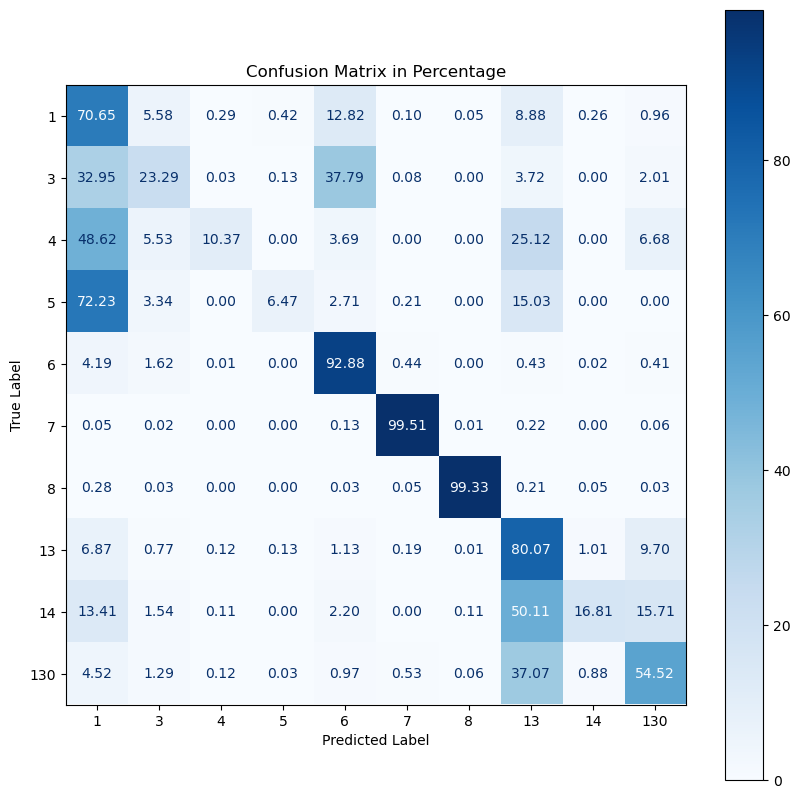

In [24]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming model_CNN is already trained and x_test, y_test_one_hot are available

# Predict the labels for the test set
y_pred = model_HAR_loaded.predict(x_test)

# Convert one-hot encoded labels to class labels
y_test_labels = y_test_one_hot.argmax(axis=1)
y_pred_labels = y_pred.argmax(axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Calculate overall accuracy
accuracy = np.trace(cm) / np.sum(cm)

# Normalize the confusion matrix by row (true classes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Convert to percentages
cm_percent = cm_normalized * 100

# Print the confusion matrix in percentages
print("Confusion Matrix (in percentages):")
print(np.around(cm_percent, decimals=2))

# Print overall accuracy
print(f"Overall Accuracy: {accuracy * 100:.2f}%")

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_percent, display_labels=np.unique(y_test_labels))
disp.plot(cmap=plt.cm.Blues, ax=ax, values_format=".2f")
plt.title('Confusion Matrix in Percentage')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)
plt.show()



<Figure size 1000x500 with 0 Axes>

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

Text(0.5, 1.0, 'Training and Validation Loss Curves')

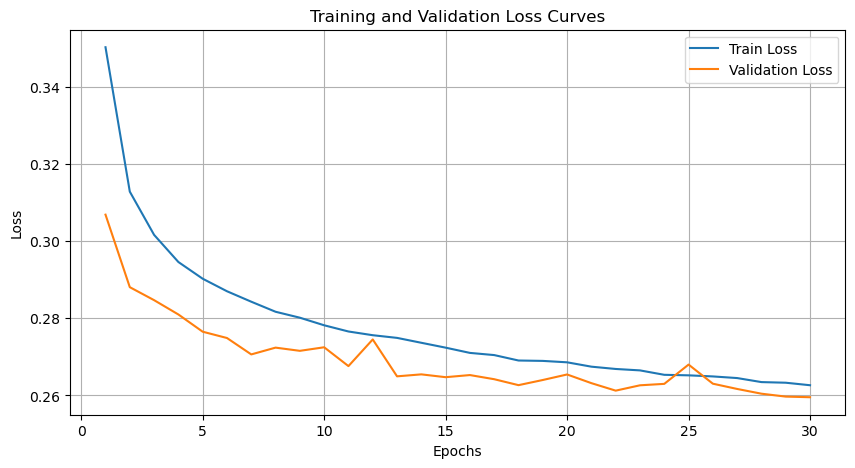

In [26]:
import matplotlib.pyplot as plt

# Extract training and validation loss from history
train_losses = history['loss']
val_losses = history['val_loss']
epochs = range(1, len(train_losses) + 1)

# Plotting train and test loss curves
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.grid(True)
plt.show()



<Figure size 1200x600 with 0 Axes>

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0.5, 0, 'Class')

Text(0, 0.5, 'Scores')

Text(0.5, 1.0, 'Per-Class Metrics')

([<matplotlib.axis.XTick at 0x193b3f8cf50>,
 [Text(0, 0, '1'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '13'),
  Text(8, 0, '14'),
  Text(9, 0, '130')])

(0.0, 1.0)

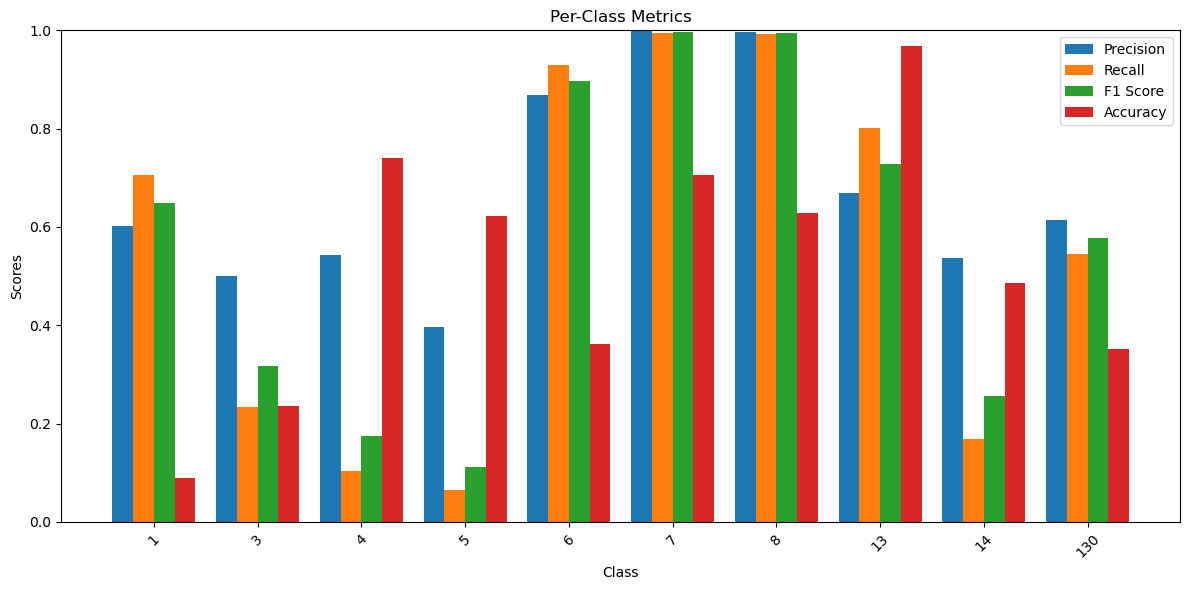

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report



# Ensure class_names contains the correct unique classes
class_names = np.unique(np.concatenate((y_test_labels, y_pred_labels)))

# Compute classification report
report = classification_report(y_test_labels, y_pred_labels, target_names=class_names, output_dict=True)

# Extract metrics for each class
per_class_precision = [report[class_name]['precision'] for class_name in class_names]
per_class_recall = [report[class_name]['recall'] for class_name in class_names]
per_class_f1 = [report[class_name]['f1-score'] for class_name in class_names]

# Example calculation of per-class accuracy (replace with your actual calculation)
per_class_accuracy = np.random.rand(len(class_names))  # Replace with actual accuracy calculation

# Plotting per-class metrics
plt.figure(figsize=(12, 6))

bar_width = 0.2
index = np.arange(len(class_names))

plt.bar(index - 1.5 * bar_width, per_class_precision, width=bar_width, label='Precision')
plt.bar(index - 0.5 * bar_width, per_class_recall, width=bar_width, label='Recall')
plt.bar(index + 0.5 * bar_width, per_class_f1, width=bar_width, label='F1 Score')
plt.bar(index + 1.5 * bar_width, per_class_accuracy, width=bar_width, label='Accuracy')

plt.xlabel('Class')
plt.ylabel('Scores')
plt.title('Per-Class Metrics')
plt.xticks(index, class_names, rotation=45)
plt.ylim(0, 1)  # Assuming accuracy ranges from 0 to 1
plt.legend()
plt.tight_layout()
plt.show()
